## Determining an equation to model the sharp sensor

In the ELEC 299 course, we used Excel to perform regression analysis to determine an appropriate model for the Sharp EO/IR sensor. However I will try to recreate that using python, to practice my programming and analytical skills a bit. 

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

reading in the .xlsx file using the read_excel(), will return a dataframe object

In [11]:
sensorData = pd.read_excel("Lab3-calculation.xlsx")
display(sensorData)

rowNum = len(sensorData)

,Analog Value,Estimated distance (CM)
0,430,10
1,255,20
2,170,30
3,105,40
4,293,15
5,161,25
6,137,35
7,97,70
8,65,80


Now I will sort based on the analog values(x values), note the difference between the 2 dataframes.

In [12]:
sensorData = sensorData.sort_values('Analog Value')
display(sensorData)

,Analog Value,Estimated distance (CM)
8,65,80
7,97,70
3,105,40
6,137,35
5,161,25
2,170,30
1,255,20
4,293,15
0,430,10


Now we must plot the estimated distance (x) against the analog value (y)

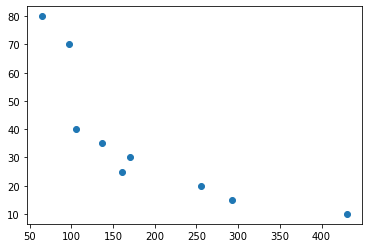

In [4]:
x = sensorData[["Analog Value"]]
y = sensorData[["Estimated distance (CM)"]]

plt.scatter(x,y)
plt.show()

To make it more compact and modular, I will functionalize the actual plotting process. Code was written by me based on the process from the GFG website.

In [5]:
def scatterPlot(xData, yData, title="x vs y", xLabel="x", yLabel="y"):
    plt.scatter(xData,yData)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    

Now to test the code I will use the same data from above.

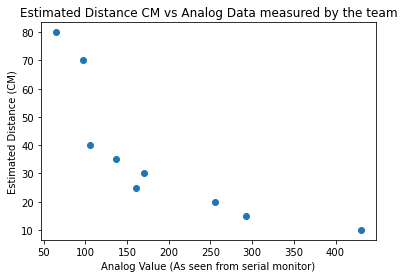

In [6]:
scatterPlot(x,y,"Estimated Distance CM vs Analog Data measured by the team", "Analog Value (As seen from serial monitor)", "Estimated Distance (CM)")
plt.show()

Now we want to get the equation of the trendline that best fits this data, allowing for the conversion of analog values to a tangible distance (cm).

To do so I will use the numpy method .polyfit() and a corresponding for loop. The for loop will be used to loop through the different degree polynomials and also because I don't know any better at this point in time. 

In [7]:
def plotTrendline(x,px,clr):
    plt.plot(x,px,clr)

Now the for loop:

In [8]:
print("X dimension: " + str(x.ndim))
print("Y dimension: " + str(y.ndim))

X dimension: 2
Y dimension: 2


While I was doing the for loop, I kept getting errors that made the program crash. Specifically the program was saying that I was inputting a 2-D array while I thought I wasn't. Turns out that I left the index column in both x and y adding an extra dimension to each.

We just need the values, so we will retrieve just the values.

In [9]:
xVal = list(np.reshape(x.values, rowNum))
yVal = list(np.reshape(y.values, rowNum))

By using the reshape method of the Numpy library, I converted the 2D array into a 1D array.

Now I will calculate the trendlines and display the equation and R^2 values.

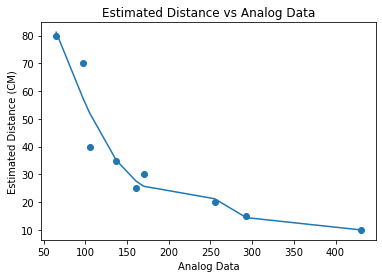

In [10]:
plt.scatter(xVal, yVal)
plt.xlabel("Analog Data")
plt.ylabel("Estimated Distance (CM)")
plt.title("Estimated Distance vs Analog Data")
# trendline stuff

model = np.poly1d(np.polyfit(xVal, yVal, 5))

plt.plot(xVal, model(xVal))
plt.show()
    

## Side Note

I had a lot of trouble properly displaying my trendline, due to the fact that my data was not prepared properly. Thus I went back and sorted it to actually get it to work. The x values must be sorted in an ascending manner whilst maintaining their respective y values.

## Actual Analysis

To compare which line and equation is the best fit, I will display trendlines (up to sixth order) superimposed over the scatter plot.

Function to compute the trendline for a given order polynomial and data set:

In [28]:
def calcTrendline(xData, yData, deg=1):
    model = np.poly1d(np.polyfit(xData, yData, deg))
    return model

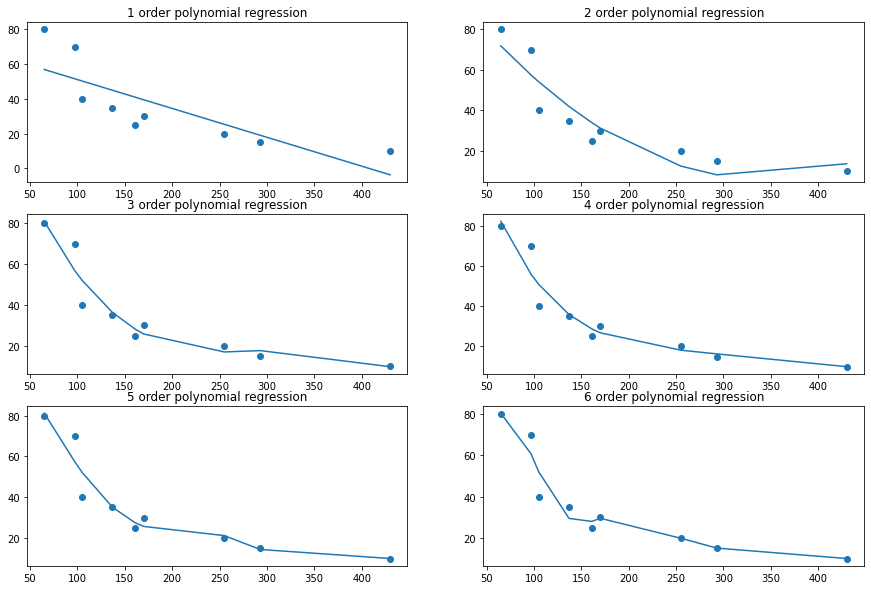

In [31]:
fig, ax = plt.subplots(3,2,figsize=(15,10)) # 3 rows, 2 column

i = 1 # var for storing the current order polynomial

for row in range(3):
    for col in range(2):
        ax[row, col].scatter(xVal, yVal)
        ax[row, col].set_title('%d order polynomial regression' % i)
        line = calcTrendline(xVal, yVal, i)
        
        ax[row, col].plot(xVal, line(xVal)) # plotting the trendline over the scatter
        
        i+=1 # incrementing the polynomial counter

plt.show()

Now that we have displayed the plots, we should summarize the equations of the lines and the respective correlation coefficients into a dataframe for easy analysis and export.

In [43]:
info_ls = [] # empty list (will convert to dataframe later)

def populateArr(deg):
    line = calcTrendline(xVal, yVal, deg)
    rsquare = r2_score(yVal, line(xVal))
    return [deg, rsquare]

for idx in range(6):
    info_ls.append(populateArr(idx+1))

print(info_ls)
# convert to pd dataframe

results = pd.DataFrame(info_ls, columns=["Polynomial Order", "R-Square Value"])
display(results)
   

[[1, 0.6434648844224093], [2, 0.8556783919569174], [3, 0.9219764888700925], [4, 0.9238964279481328], [5, 0.9286106490707783], [6, 0.9414163781938519]]


,Polynomial Order,R-Square Value
0,1,0.643465
1,2,0.855678
2,3,0.921976
3,4,0.923896
4,5,0.928611
5,6,0.941416


Now that we have the dataframe, lets sort it in a descending order to see which has the best r-square.

In [45]:
results = results.sort_values('R-Square Value', ascending=False)
display(results)

,Polynomial Order,R-Square Value
5,6,0.941416
4,5,0.928611
3,4,0.923896
2,3,0.921976
1,2,0.855678
0,1,0.643465


From here we can see that the best fit polynomial is one of sixth-order, but it should be noted that this polynomial may overfit the data given that the intial dataset it quite small.

The data itself was also not collected in the most accurate of manners, we didn't even have a ruler to take measurements. So everything here should be taken with a grain of salt.